In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import pyqg
from pyqg import diagnostic_tools as tools

#conda install -c conda-forge ffmpeg
import matplotlib.animation as manimation # animations
%run coarsening_ops.ipynb

---
### 0. 1 layer (Barotropic/BT) model 
- no net gain/loss of circulation
- density depends solely on pressure
- flow is assumed to be horizontally homogeneous and depth-independent/depth averaged (vertical variation is small relative to horizontal)


- better for large scale, low frequency phenomena 

In [2]:
# plot function
def plot_qBT(m, show_plot=True):
    extent = [0, m.nx, 0, m.nx]
    fig, ax = plt.subplots()
    pc = ax.imshow(m.q.squeeze(), cmap='RdBu_r', extent=extent)
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    
    if show_plot:
        plt.show()
    return fig, ax, pc

In [3]:
# animate function
def animateBT(m, title):
    FFMpegWriter = manimation.writers['ffmpeg']
    writer = FFMpegWriter(fps=4)
    vid_title = title
    
    fig, ax, l = plot_qBT(m, show_plot=False)
    with writer.saving(fig, "{}.mp4".format(vid_title), 100):
        writer.grab_frame() # initial data
        for _ in m.run_with_snapshots(tsnapstart=0, tsnapint=1):
            #l.set_clim(vmin = m.q.min(), vmax = m.q.max()) # this is just to check that it is not the initial scale that seems to generate a steady state
            l.set_data(m.q.squeeze())
            plt.title('Time = %g' % m.t)
            writer.grab_frame()

##### 0.1 Simple Barotropic Model with Random IC

In [4]:
# Model 1: Simple Barotropic Model (64)
L_1 = 1.       # domain length (meters)
nx_1 = 64      # 64 grid points
rek_1 = 0.     # no bottom friction (1/sec)
beta_1 = 0.    # no coriolis gradient 
H_1 = 1.       # layer of thickness/depth 1
rd_1 = None    # no deformation radius
tmax_1 = 40.   # total simulation: 40 seconds
dt_1 = 0.001   # numerical timestep
taveint_1 = 1. # accumulate diagnostic avgs every 1 sec

modelBT_1 = pyqg.BTModel(L=L_1, nx=nx_1, beta=beta_1, H=H_1, rek=rek_1, rd=rd_1,
                 tmax=tmax_1, dt=dt_1, taveint=taveint_1)

INFO:  Logger initialized


In [5]:
modelBT_1.run()

INFO: Step: 1000, Time: 1.00e+00, KE: 5.70e-12, CFL: 0.000
INFO: Step: 2000, Time: 2.00e+00, KE: 5.69e-12, CFL: 0.000
INFO: Step: 3000, Time: 3.00e+00, KE: 5.69e-12, CFL: 0.000
INFO: Step: 4000, Time: 4.00e+00, KE: 5.68e-12, CFL: 0.000
INFO: Step: 5000, Time: 5.00e+00, KE: 5.68e-12, CFL: 0.000
INFO: Step: 6000, Time: 6.00e+00, KE: 5.68e-12, CFL: 0.000
INFO: Step: 7000, Time: 7.00e+00, KE: 5.68e-12, CFL: 0.000
INFO: Step: 8000, Time: 8.00e+00, KE: 5.68e-12, CFL: 0.000
INFO: Step: 9000, Time: 9.00e+00, KE: 5.68e-12, CFL: 0.000
INFO: Step: 10000, Time: 1.00e+01, KE: 5.68e-12, CFL: 0.000
INFO: Step: 11000, Time: 1.10e+01, KE: 5.68e-12, CFL: 0.000
INFO: Step: 12000, Time: 1.20e+01, KE: 5.68e-12, CFL: 0.000
INFO: Step: 13000, Time: 1.30e+01, KE: 5.68e-12, CFL: 0.000
INFO: Step: 14000, Time: 1.40e+01, KE: 5.67e-12, CFL: 0.000
INFO: Step: 15000, Time: 1.50e+01, KE: 5.67e-12, CFL: 0.000
INFO: Step: 16000, Time: 1.60e+01, KE: 5.67e-12, CFL: 0.000
INFO: Step: 17000, Time: 1.70e+01, KE: 5.67e-12, 

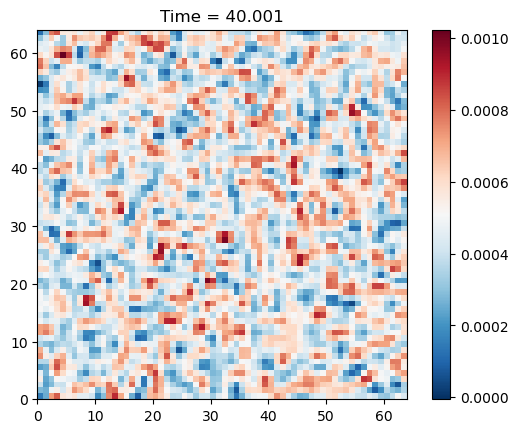

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'Time = 40.001'}>,
 <matplotlib.image.AxesImage at 0x7fbf41c602e0>)

In [6]:
# Plot final distribution of vorticity
plot_qBT(modelBT_1)

INFO:  Logger initialized
INFO: Step: 1000, Time: 1.00e+00, KE: 5.79e-12, CFL: 0.000
INFO: Step: 2000, Time: 2.00e+00, KE: 5.78e-12, CFL: 0.000
INFO: Step: 3000, Time: 3.00e+00, KE: 5.78e-12, CFL: 0.000
INFO: Step: 4000, Time: 4.00e+00, KE: 5.77e-12, CFL: 0.000
INFO: Step: 5000, Time: 5.00e+00, KE: 5.77e-12, CFL: 0.000
INFO: Step: 6000, Time: 6.00e+00, KE: 5.77e-12, CFL: 0.000
INFO: Step: 7000, Time: 7.00e+00, KE: 5.77e-12, CFL: 0.000
INFO: Step: 8000, Time: 8.00e+00, KE: 5.76e-12, CFL: 0.000
INFO: Step: 9000, Time: 9.00e+00, KE: 5.76e-12, CFL: 0.000
INFO: Step: 10000, Time: 1.00e+01, KE: 5.76e-12, CFL: 0.000
INFO: Step: 11000, Time: 1.10e+01, KE: 5.76e-12, CFL: 0.000
INFO: Step: 12000, Time: 1.20e+01, KE: 5.76e-12, CFL: 0.000
INFO: Step: 13000, Time: 1.30e+01, KE: 5.76e-12, CFL: 0.000
INFO: Step: 14000, Time: 1.40e+01, KE: 5.76e-12, CFL: 0.000
INFO: Step: 15000, Time: 1.50e+01, KE: 5.76e-12, CFL: 0.000
INFO: Step: 16000, Time: 1.60e+01, KE: 5.76e-12, CFL: 0.000
INFO: Step: 17000, Time

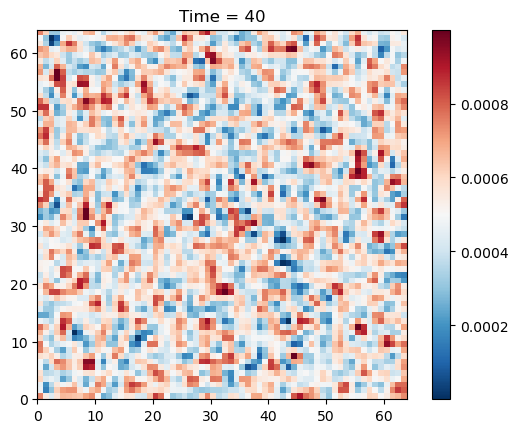

In [7]:
# Plot animation of distribution progression
# Must reinitialize
modelBT_1 = pyqg.BTModel(L=L_1, nx=nx_1, beta=beta_1, H=H_1, rek=rek_1, rd=rd_1,
                 tmax=tmax_1, dt=dt_1, taveint=taveint_1, ntd=4)

animateBT(modelBT_1,'BT_IC1')

# Notes:
# Doesn't seem very interesting, likely reached steady state within first iterations

##### 0.2 Barotropic Model with higher resolution IC

INFO:  Logger initialized
INFO: Step: 1000, Time: 1.00e+00, KE: 4.72e-13, CFL: 0.000
INFO: Step: 2000, Time: 2.00e+00, KE: 4.72e-13, CFL: 0.000
INFO: Step: 3000, Time: 3.00e+00, KE: 4.71e-13, CFL: 0.000
INFO: Step: 4000, Time: 4.00e+00, KE: 4.71e-13, CFL: 0.000
INFO: Step: 5000, Time: 5.00e+00, KE: 4.71e-13, CFL: 0.000
INFO: Step: 6000, Time: 6.00e+00, KE: 4.71e-13, CFL: 0.000
INFO: Step: 7000, Time: 7.00e+00, KE: 4.71e-13, CFL: 0.000
INFO: Step: 8000, Time: 8.00e+00, KE: 4.71e-13, CFL: 0.000
INFO: Step: 9000, Time: 9.00e+00, KE: 4.71e-13, CFL: 0.000
INFO: Step: 10000, Time: 1.00e+01, KE: 4.71e-13, CFL: 0.000
INFO: Step: 11000, Time: 1.10e+01, KE: 4.71e-13, CFL: 0.000
INFO: Step: 12000, Time: 1.20e+01, KE: 4.71e-13, CFL: 0.000
INFO: Step: 13000, Time: 1.30e+01, KE: 4.71e-13, CFL: 0.000
INFO: Step: 14000, Time: 1.40e+01, KE: 4.71e-13, CFL: 0.000
INFO: Step: 15000, Time: 1.50e+01, KE: 4.71e-13, CFL: 0.000
INFO: Step: 16000, Time: 1.60e+01, KE: 4.71e-13, CFL: 0.000
INFO: Step: 17000, Time

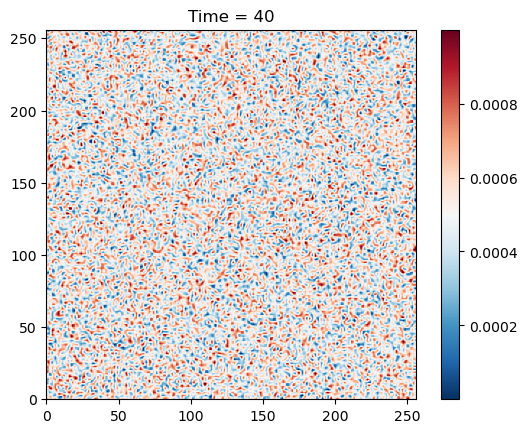

In [8]:
# Model 2: Simple Barotropic Model (256)
L_2 = 1.       # domain length (meters)
nx_2 = 256     # 256 grid points
rek_2 = 0.     # no bottom friction (1/sec)
beta_2 = 0.    # no coriolis gradient 
H_2 = 1.       # layer of thickness/depth 1
rd_2 = None    # no deformation radius
tmax_2 = 40.   # total simulation: 40 seconds
dt_2 = 0.001   # numerical timestep
taveint_2 = 1. # accumulate diagnostic avgs every 1 sec

modelBT_2 = pyqg.BTModel(L=L_2, nx=nx_2, beta=beta_2, H=H_2, rek=rek_2, rd=rd_2,
                 tmax=tmax_2, dt=dt_2, taveint=taveint_2)
animateBT(modelBT_2, 'BT_IC2')

# Notes:
# Also doesn't seem very interesting, likely reached steady state within first iterations

##### 0.3 Barotropic Model with IC for Coherent Vortices in Turbulent Flow

* Here we ensure the generation of coherent vortices by introducing small-scale vortices with random amplitudes/phases/orientations across the domain

i.e. let's make it more interesting...

In [9]:
# Model 2: Barotropic Model with IC to produce coherent vortices
L_3 = 2.*np.pi # domain length (meters)
nx_3 = 64      # 64 grid points
rek_3 = 0.     # no bottom friction (1/sec)
beta_3 = 0.    # no coriolis gradient 
H_3 = 1.       # layer of thickness/depth 1
rd_3 = None    # no deformation radius
tmax_3 = 40.   # total simulation: 40 seconds
dt_3 = 0.001   # numerical timestep
taveint_3 = 1. # accumulate diagnostic avgs every 1 sec

modelBT_3 = pyqg.BTModel(L=L_3, nx=nx_3,
                 beta=beta_3, H=H_3, rek=rek_3, rd=rd_3,
                 tmax=tmax_3, dt=dt_3, taveint=taveint_3)
#----------------------------#
# McWilliams 84 IC condition #
fk = modelBT_3.wv != 0 # boolean array: True iff element in m.wv is nonzero
ckappa = np.zeros_like(modelBT_3.wv2)
ckappa[fk] = np.sqrt( modelBT_3.wv2[fk]*(1. + (modelBT_3.wv2[fk]/36.)**2) )**-1

nhx,nhy = modelBT_3.wv2.shape

Pi_hat = np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa

Pi = modelBT_3.ifft( Pi_hat[np.newaxis,:,:] )
Pi = Pi - Pi.mean()
Pi_hat = modelBT_3.fft( Pi )
KEaux = modelBT_3.spec_var( modelBT_3.wv*Pi_hat )

pih = ( Pi_hat/np.sqrt(KEaux) )
qih = -modelBT_3.wv2*pih
qi = modelBT_3.ifft(qih)
#----------------------------#

# initialize the model with that initial condition
modelBT_3.set_q(qi)

INFO:  Logger initialized


INFO: Step: 1000, Time: 1.00e+00, KE: 4.69e-01, CFL: 0.026
INFO: Step: 2000, Time: 2.00e+00, KE: 4.57e-01, CFL: 0.028
INFO: Step: 3000, Time: 3.00e+00, KE: 4.49e-01, CFL: 0.022
INFO: Step: 4000, Time: 4.00e+00, KE: 4.44e-01, CFL: 0.026
INFO: Step: 5000, Time: 5.00e+00, KE: 4.40e-01, CFL: 0.023
INFO: Step: 6000, Time: 6.00e+00, KE: 4.37e-01, CFL: 0.025
INFO: Step: 7000, Time: 7.00e+00, KE: 4.35e-01, CFL: 0.023
INFO: Step: 8000, Time: 8.00e+00, KE: 4.34e-01, CFL: 0.022
INFO: Step: 9000, Time: 9.00e+00, KE: 4.32e-01, CFL: 0.022
INFO: Step: 10000, Time: 1.00e+01, KE: 4.31e-01, CFL: 0.021
INFO: Step: 11000, Time: 1.10e+01, KE: 4.31e-01, CFL: 0.020
INFO: Step: 12000, Time: 1.20e+01, KE: 4.30e-01, CFL: 0.021
INFO: Step: 13000, Time: 1.30e+01, KE: 4.29e-01, CFL: 0.023
INFO: Step: 14000, Time: 1.40e+01, KE: 4.29e-01, CFL: 0.025
INFO: Step: 15000, Time: 1.50e+01, KE: 4.29e-01, CFL: 0.021
INFO: Step: 16000, Time: 1.60e+01, KE: 4.28e-01, CFL: 0.020
INFO: Step: 17000, Time: 1.70e+01, KE: 4.28e-01, 

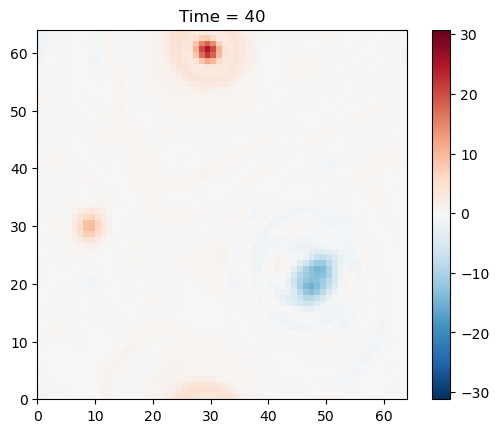

In [10]:
# animation
animateBT(modelBT_3, 'BT_IC3')

---
### 1. 2 layer (QG) model
- Baroclinic fluid: density is a function of pressure and temperature, etc.
- density can vary with horizontal position/vertical depth

Used for Benchmarking paper*

#### 1.1 Simple Model with Random IC

In [11]:
# 2 layer (QG) model (16)
# Model parameters for the 'smallest' grid size

L1 = 1.0          # Domain size (meters)
nx1 = 16          # Number of grid points in x-direction
ny1 = 16          # Number of grid points in y-direction
dt1 = 0.01        # Time step (seconds)
tmax1 = 10000    # Total simulation time (seconds)
taveint1 = 10     # Time interval for accumulation of diagnostic averages (seconds)

modelQG_1 = pyqg.QGModel(nx=nx1, ny=ny1, L=L1, dt=dt1, tmax=tmax1, taveint=taveint1)

modelQG_1.run()

#for _ in modelQG_1.run_with_snapshots(tsnapstart=0, tsnapint=10):
#    print(modelQG_1.t)
#    print(modelQG_1.q)

INFO:  Logger initialized
INFO: Step: 1000, Time: 1.00e+01, KE: 1.52e-17, CFL: 0.004
INFO: Step: 2000, Time: 2.00e+01, KE: 1.52e-17, CFL: 0.004
INFO: Step: 3000, Time: 3.00e+01, KE: 1.52e-17, CFL: 0.004
INFO: Step: 4000, Time: 4.00e+01, KE: 1.52e-17, CFL: 0.004
INFO: Step: 5000, Time: 5.00e+01, KE: 1.52e-17, CFL: 0.004
INFO: Step: 6000, Time: 6.00e+01, KE: 1.52e-17, CFL: 0.004
INFO: Step: 7000, Time: 7.00e+01, KE: 1.52e-17, CFL: 0.004
INFO: Step: 8000, Time: 8.00e+01, KE: 1.52e-17, CFL: 0.004
INFO: Step: 9000, Time: 9.00e+01, KE: 1.52e-17, CFL: 0.004
INFO: Step: 10000, Time: 1.00e+02, KE: 1.52e-17, CFL: 0.004
INFO: Step: 11000, Time: 1.10e+02, KE: 1.52e-17, CFL: 0.004
INFO: Step: 12000, Time: 1.20e+02, KE: 1.52e-17, CFL: 0.004
INFO: Step: 13000, Time: 1.30e+02, KE: 1.52e-17, CFL: 0.004
INFO: Step: 14000, Time: 1.40e+02, KE: 1.52e-17, CFL: 0.004
INFO: Step: 15000, Time: 1.50e+02, KE: 1.52e-17, CFL: 0.004
INFO: Step: 16000, Time: 1.60e+02, KE: 1.52e-17, CFL: 0.004
INFO: Step: 17000, Time

INFO: Step: 137000, Time: 1.37e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 138000, Time: 1.38e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 139000, Time: 1.39e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 140000, Time: 1.40e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 141000, Time: 1.41e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 142000, Time: 1.42e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 143000, Time: 1.43e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 144000, Time: 1.44e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 145000, Time: 1.45e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 146000, Time: 1.46e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 147000, Time: 1.47e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 148000, Time: 1.48e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 149000, Time: 1.49e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 150000, Time: 1.50e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 151000, Time: 1.51e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 152000, Time: 1.52e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 153000, Time

INFO: Step: 272000, Time: 2.72e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 273000, Time: 2.73e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 274000, Time: 2.74e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 275000, Time: 2.75e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 276000, Time: 2.76e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 277000, Time: 2.77e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 278000, Time: 2.78e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 279000, Time: 2.79e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 280000, Time: 2.80e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 281000, Time: 2.81e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 282000, Time: 2.82e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 283000, Time: 2.83e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 284000, Time: 2.84e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 285000, Time: 2.85e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 286000, Time: 2.86e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 287000, Time: 2.87e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 288000, Time

INFO: Step: 407000, Time: 4.07e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 408000, Time: 4.08e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 409000, Time: 4.09e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 410000, Time: 4.10e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 411000, Time: 4.11e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 412000, Time: 4.12e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 413000, Time: 4.13e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 414000, Time: 4.14e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 415000, Time: 4.15e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 416000, Time: 4.16e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 417000, Time: 4.17e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 418000, Time: 4.18e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 419000, Time: 4.19e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 420000, Time: 4.20e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 421000, Time: 4.21e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 422000, Time: 4.22e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 423000, Time

INFO: Step: 542000, Time: 5.42e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 543000, Time: 5.43e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 544000, Time: 5.44e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 545000, Time: 5.45e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 546000, Time: 5.46e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 547000, Time: 5.47e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 548000, Time: 5.48e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 549000, Time: 5.49e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 550000, Time: 5.50e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 551000, Time: 5.51e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 552000, Time: 5.52e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 553000, Time: 5.53e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 554000, Time: 5.54e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 555000, Time: 5.55e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 556000, Time: 5.56e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 557000, Time: 5.57e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 558000, Time

INFO: Step: 677000, Time: 6.77e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 678000, Time: 6.78e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 679000, Time: 6.79e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 680000, Time: 6.80e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 681000, Time: 6.81e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 682000, Time: 6.82e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 683000, Time: 6.83e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 684000, Time: 6.84e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 685000, Time: 6.85e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 686000, Time: 6.86e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 687000, Time: 6.87e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 688000, Time: 6.88e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 689000, Time: 6.89e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 690000, Time: 6.90e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 691000, Time: 6.91e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 692000, Time: 6.92e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 693000, Time

INFO: Step: 812000, Time: 8.12e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 813000, Time: 8.13e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 814000, Time: 8.14e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 815000, Time: 8.15e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 816000, Time: 8.16e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 817000, Time: 8.17e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 818000, Time: 8.18e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 819000, Time: 8.19e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 820000, Time: 8.20e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 821000, Time: 8.21e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 822000, Time: 8.22e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 823000, Time: 8.23e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 824000, Time: 8.24e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 825000, Time: 8.25e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 826000, Time: 8.26e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 827000, Time: 8.27e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 828000, Time

INFO: Step: 947000, Time: 9.47e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 948000, Time: 9.48e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 949000, Time: 9.49e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 950000, Time: 9.50e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 951000, Time: 9.51e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 952000, Time: 9.52e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 953000, Time: 9.53e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 954000, Time: 9.54e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 955000, Time: 9.55e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 956000, Time: 9.56e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 957000, Time: 9.57e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 958000, Time: 9.58e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 959000, Time: 9.59e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 960000, Time: 9.60e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 961000, Time: 9.61e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 962000, Time: 9.62e+03, KE: 1.52e-17, CFL: 0.004
INFO: Step: 963000, Time

In [12]:
# Create dataset for more interpretable access 
modelQG_1_ds = modelQG_1.to_dataset().isel(time=-1)
modelQG_1_ds

/Users/peterjin/opt/anaconda3/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


<xarray.Dataset>
Dimensions:  (lev: 2, y: 16, x: 16, l: 16, k: 9, lev_mid: 1)
Coordinates:
    time     float64 1e+04
  * lev      (lev) int64 1 2
  * lev_mid  (lev_mid) float64 1.5
  * x        (x) float64 0.03125 0.09375 0.1562 0.2188 ... 0.8438 0.9062 0.9688
  * y        (y) float64 0.03125 0.09375 0.1562 0.2188 ... 0.8438 0.9062 0.9688
  * l        (l) float64 0.0 6.283 12.57 18.85 ... -25.13 -18.85 -12.57 -6.283
  * k        (k) float64 0.0 6.283 12.57 18.85 25.13 31.42 37.7 43.98 50.27
Data variables: (12/14)
    q        (lev, y, x) float64 4.944e-07 3.178e-07 ... 6.894e-22 6.894e-22
    u        (lev, y, x) float64 -1.581e-10 2.672e-10 ... 5.486e-21 6.35e-21
    v        (lev, y, x) float64 6.053e-09 6.367e-09 ... 1.711e-19 1.492e-19
    ufull    (lev, y, x) float64 0.025 0.025 0.025 ... 5.486e-21 6.35e-21
    vfull    (lev, y, x) float64 6.053e-09 6.367e-09 ... 1.711e-19 1.492e-19
    qh       (lev, l, k) complex128 (0.00010381263998392832+0j) ... (-3.16260...
    ...       ...
    ph       (lev, l, k) complex128 0j ... (3.2129343550723865e-48-1.88979164...
    dqhdt    (lev, l, k) complex128 (-0-0j) ... (-1.0473232064818253e-45+9.30...
    Ubg      (lev) float64 0.025 0.0
    Qy       (lev) float64 1.039e-10 -7.222e-12
    dqdt     (lev, y, x) float64 2.627e-08 5.725e-08 ... 6.133e-26 3.524e-25
    p        (lev, y, x) float64 9.399e-10 1.391e-09 ... 7.016e-21 1.719e-20
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         0.01
    pyqg:filterfac:  23.6
    pyqg:L:          1.0
    ...              ...
    pyqg:tc:         1000000
    pyqg:tmax:       10000
    pyqg:twrite:     1000.0
    pyqg:W:          1.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [13]:
# Functions to plot Upper PV Anomaly
# --> Does the same thing, may return different colorbar scales

def plotUPVA(m_ds, show_plot=True): # use converted dataset
    m_ds['q_upper'] = m_ds.q.isel(lev=0) + m_ds.Qy.isel(lev=0)*m_ds.y
    m_ds['q_upper'].attrs = {'long_name': 'upper layer PV anomaly'}
    fig, ax = plt.subplots()
    pc = m_ds.q_upper.plot.contourf(levels=18, cmap='RdBu_r');
    if show_plot:
        plt.show()
    return fig, ax, pc

def plotUPVA1(m, show_plot=True): # use model directly
    fig, ax = plt.subplots()
    q_upper = m.q[0] + m.Qy[0]*m.y
    pc = plt.contourf(m.x, m.y, q_upper, 18, cmap='RdBu_r')
    plt.title('Upper Layer PV Anomaly at Time = %g' % m.t)

    ax.set_aspect(1)
    plt.colorbar(pc)
    
    if show_plot:
        plt.show()
    return fig, ax, pc

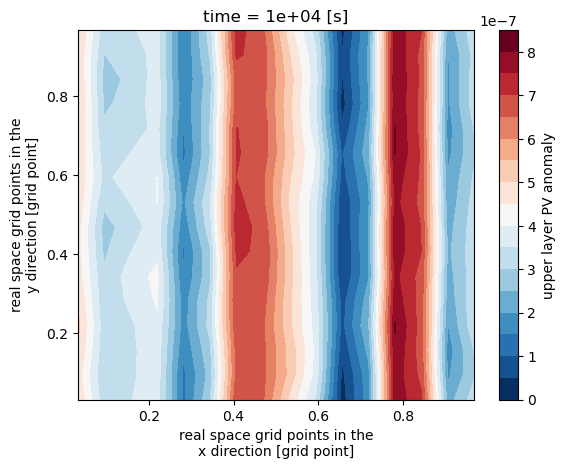

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'time = 1e+04 [s]'}, xlabel='real space grid points in the\nx direction [grid point]', ylabel='real space grid points in the\ny direction [grid point]'>,
 <matplotlib.contour.QuadContourSet at 0x7fbf486e8490>)

In [14]:
# 1st plot function
plotUPVA(modelQG_1_ds)

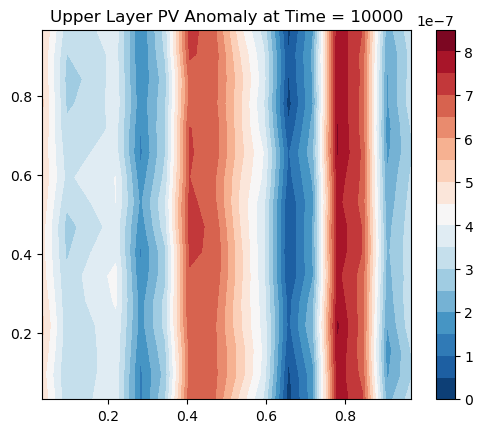

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'Upper Layer PV Anomaly at Time = 10000'}>,
 <matplotlib.contour.QuadContourSet at 0x7fbf487c0820>)

In [15]:
# 2nd plot function
plotUPVA1(modelQG_1)

In [16]:
# animation function
def animateQG(m, title):
    FFMpegWriter = manimation.writers['ffmpeg']
    writer = FFMpegWriter(fps=5)
    vid_title = title

    fig, ax, l = plotUPVA1(m)
    with writer.saving(fig, "{}.mp4".format(vid_title), 100):
        writer.grab_frame() # initial data
        for _ in m.run_with_snapshots(tsnapstart=0, tsnapint=100):
            l.set_array(m.q.squeeze())
            plt.title('Time = %g' % m.t)
            writer.grab_frame()

INFO:  Logger initialized


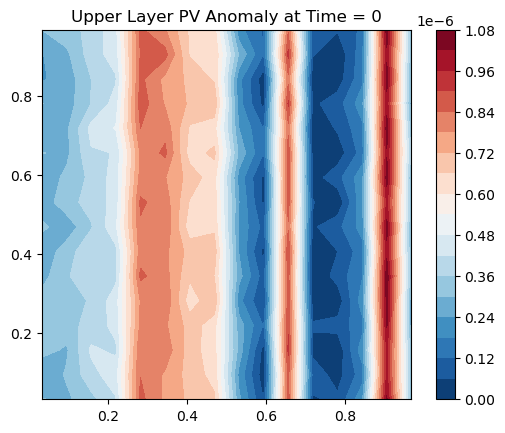

INFO: Step: 1000, Time: 1.00e+01, KE: 5.41e-17, CFL: 0.004
INFO: Step: 2000, Time: 2.00e+01, KE: 5.41e-17, CFL: 0.004
INFO: Step: 3000, Time: 3.00e+01, KE: 5.41e-17, CFL: 0.004
INFO: Step: 4000, Time: 4.00e+01, KE: 5.41e-17, CFL: 0.004
INFO: Step: 5000, Time: 5.00e+01, KE: 5.41e-17, CFL: 0.004
INFO: Step: 6000, Time: 6.00e+01, KE: 5.41e-17, CFL: 0.004
INFO: Step: 7000, Time: 7.00e+01, KE: 5.41e-17, CFL: 0.004
INFO: Step: 8000, Time: 8.00e+01, KE: 5.41e-17, CFL: 0.004
INFO: Step: 9000, Time: 9.00e+01, KE: 5.41e-17, CFL: 0.004
INFO: Step: 10000, Time: 1.00e+02, KE: 5.41e-17, CFL: 0.004
INFO: Step: 11000, Time: 1.10e+02, KE: 5.41e-17, CFL: 0.004
INFO: Step: 12000, Time: 1.20e+02, KE: 5.41e-17, CFL: 0.004
INFO: Step: 13000, Time: 1.30e+02, KE: 5.41e-17, CFL: 0.004
INFO: Step: 14000, Time: 1.40e+02, KE: 5.41e-17, CFL: 0.004
INFO: Step: 15000, Time: 1.50e+02, KE: 5.41e-17, CFL: 0.004
INFO: Step: 16000, Time: 1.60e+02, KE: 5.41e-17, CFL: 0.004
INFO: Step: 17000, Time: 1.70e+02, KE: 5.41e-17, 

INFO: Step: 138000, Time: 1.38e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 139000, Time: 1.39e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 140000, Time: 1.40e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 141000, Time: 1.41e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 142000, Time: 1.42e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 143000, Time: 1.43e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 144000, Time: 1.44e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 145000, Time: 1.45e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 146000, Time: 1.46e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 147000, Time: 1.47e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 148000, Time: 1.48e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 149000, Time: 1.49e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 150000, Time: 1.50e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 151000, Time: 1.51e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 152000, Time: 1.52e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 153000, Time: 1.53e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 154000, Time

INFO: Step: 273000, Time: 2.73e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 274000, Time: 2.74e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 275000, Time: 2.75e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 276000, Time: 2.76e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 277000, Time: 2.77e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 278000, Time: 2.78e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 279000, Time: 2.79e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 280000, Time: 2.80e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 281000, Time: 2.81e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 282000, Time: 2.82e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 283000, Time: 2.83e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 284000, Time: 2.84e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 285000, Time: 2.85e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 286000, Time: 2.86e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 287000, Time: 2.87e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 288000, Time: 2.88e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 289000, Time

INFO: Step: 408000, Time: 4.08e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 409000, Time: 4.09e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 410000, Time: 4.10e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 411000, Time: 4.11e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 412000, Time: 4.12e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 413000, Time: 4.13e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 414000, Time: 4.14e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 415000, Time: 4.15e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 416000, Time: 4.16e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 417000, Time: 4.17e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 418000, Time: 4.18e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 419000, Time: 4.19e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 420000, Time: 4.20e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 421000, Time: 4.21e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 422000, Time: 4.22e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 423000, Time: 4.23e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 424000, Time

INFO: Step: 543000, Time: 5.43e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 544000, Time: 5.44e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 545000, Time: 5.45e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 546000, Time: 5.46e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 547000, Time: 5.47e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 548000, Time: 5.48e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 549000, Time: 5.49e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 550000, Time: 5.50e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 551000, Time: 5.51e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 552000, Time: 5.52e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 553000, Time: 5.53e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 554000, Time: 5.54e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 555000, Time: 5.55e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 556000, Time: 5.56e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 557000, Time: 5.57e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 558000, Time: 5.58e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 559000, Time

INFO: Step: 678000, Time: 6.78e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 679000, Time: 6.79e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 680000, Time: 6.80e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 681000, Time: 6.81e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 682000, Time: 6.82e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 683000, Time: 6.83e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 684000, Time: 6.84e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 685000, Time: 6.85e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 686000, Time: 6.86e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 687000, Time: 6.87e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 688000, Time: 6.88e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 689000, Time: 6.89e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 690000, Time: 6.90e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 691000, Time: 6.91e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 692000, Time: 6.92e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 693000, Time: 6.93e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 694000, Time

INFO: Step: 813000, Time: 8.13e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 814000, Time: 8.14e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 815000, Time: 8.15e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 816000, Time: 8.16e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 817000, Time: 8.17e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 818000, Time: 8.18e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 819000, Time: 8.19e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 820000, Time: 8.20e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 821000, Time: 8.21e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 822000, Time: 8.22e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 823000, Time: 8.23e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 824000, Time: 8.24e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 825000, Time: 8.25e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 826000, Time: 8.26e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 827000, Time: 8.27e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 828000, Time: 8.28e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 829000, Time

INFO: Step: 948000, Time: 9.48e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 949000, Time: 9.49e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 950000, Time: 9.50e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 951000, Time: 9.51e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 952000, Time: 9.52e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 953000, Time: 9.53e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 954000, Time: 9.54e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 955000, Time: 9.55e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 956000, Time: 9.56e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 957000, Time: 9.57e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 958000, Time: 9.58e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 959000, Time: 9.59e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 960000, Time: 9.60e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 961000, Time: 9.61e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 962000, Time: 9.62e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 963000, Time: 9.63e+03, KE: 5.41e-17, CFL: 0.004
INFO: Step: 964000, Time

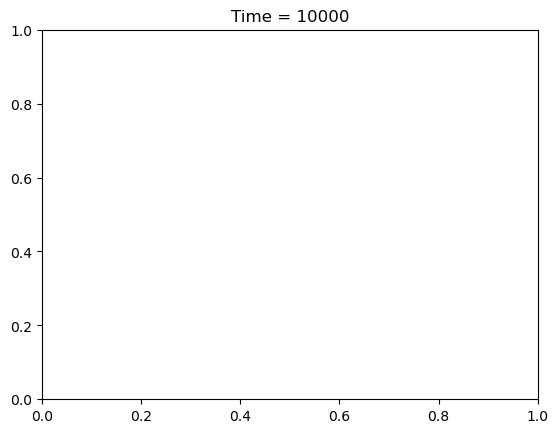

In [17]:
# Reinitialize, can we animate it to see some development?

modelQG_1 = pyqg.QGModel(nx=nx1, ny=ny1, L=L1, dt=dt1, tmax=tmax1, taveint=taveint1)

animateQG(modelQG_1, 'QG_IC1')

# Notes:
# Uninteresting, is this due to resolution or IC?

#### 1.2 A More Interesting Model with Random IC

In [18]:
# 64x64
# longer timeframe for evolution

year = 24*60*60*360.
tmax2=10*year
twrite2=10000
tavestart2=5*year

modelQG_2 = pyqg.QGModel(tmax=tmax2, twrite=twrite2, tavestart=tavestart2)

INFO:  Logger initialized


INFO: Step: 10000, Time: 7.20e+07, KE: 4.70e-04, CFL: 0.093
INFO: Step: 20000, Time: 1.44e+08, KE: 4.97e-04, CFL: 0.106
INFO: Step: 30000, Time: 2.16e+08, KE: 4.82e-04, CFL: 0.079
INFO: Step: 40000, Time: 2.88e+08, KE: 4.78e-04, CFL: 0.098


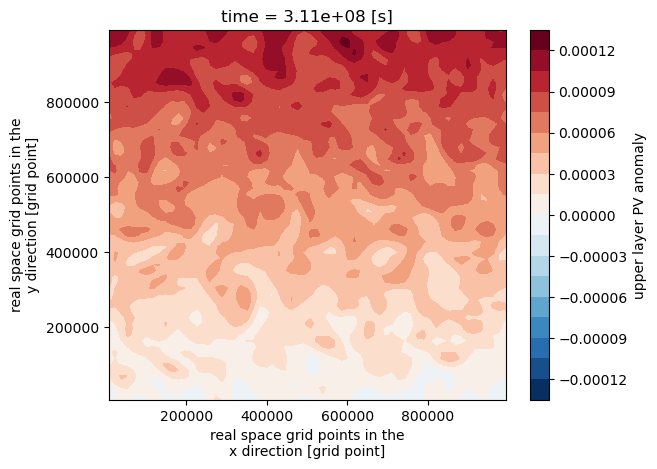

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'time = 3.11e+08 [s]'}, xlabel='real space grid points in the\nx direction [grid point]', ylabel='real space grid points in the\ny direction [grid point]'>,
 <matplotlib.contour.QuadContourSet at 0x7fbf48fc1160>)

In [19]:
modelQG_2.run()
modelQG_2_ds = modelQG_2.to_dataset().isel(time=-1)
plotUPVA(modelQG_2_ds)

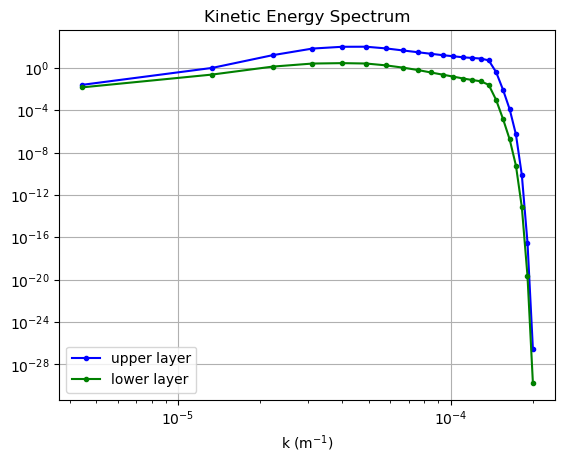

In [20]:
# Plot Diagnostic: Kinetic Energy Spectrum
def plotKES(m):
    m_ds = m.to_dataset().isel(time=-1)

    kr, kespec_upper = tools.calc_ispec(m, m_ds.KEspec.isel(lev=0).data)
    _, kespec_lower = tools.calc_ispec(m, m_ds.KEspec.isel(lev=1).data)
    plt.loglog(kr, kespec_upper, 'b.-', label='upper layer')
    plt.loglog(kr, kespec_lower, 'g.-', label='lower layer')
    plt.legend(loc='lower left')
    plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
    plt.title('Kinetic Energy Spectrum');
    
plotKES(modelQG_2)

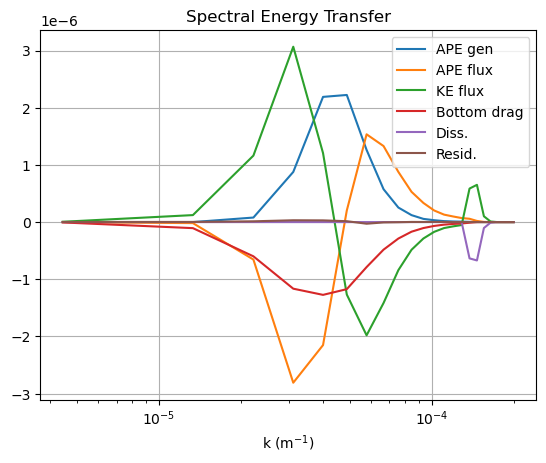

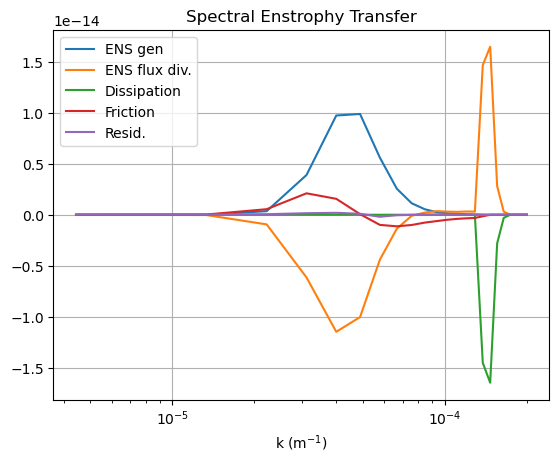

In [21]:
# Plot Diagnostic: Spectral Energy and Enstrophy Flux 
# (i.e. energy and enstrophy budget, both of which should sum to 0)
def plotSFlux(m, e): #e is either energy or enstrophy
    m_ds = m.to_dataset().isel(time=-1)
    kr, APEgenspec = tools.calc_ispec(m, m_ds.APEgenspec.data)

    if e == 'energy':
        _, APEflux = tools.calc_ispec(m, m_ds.APEflux.data)
        _, KEflux = tools.calc_ispec(m, m_ds.KEflux.data)
        _, KEfrictionspec = tools.calc_ispec(m, m_ds.KEfrictionspec.data)
        _, Dissspec = tools.calc_ispec(m, m_ds.Dissspec.data)
        ebud = [ APEgenspec,
        APEflux,
        KEflux,
        KEfrictionspec,
        Dissspec]
        ebud.append(-np.vstack(ebud).sum(axis=0))
        ebud_labels = ['APE gen','APE flux','KE flux','Bottom drag','Diss.','Resid.']
        [plt.semilogx(kr, term) for term in ebud]
        plt.legend(ebud_labels, loc='upper right')
        plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
        plt.title('Spectral Energy Transfer');
        plt.show()
    if e == 'enstrophy':
        _, ENSflux = tools.calc_ispec(m, m_ds.ENSflux.data.squeeze())
        _, ENSgenspec = tools.calc_ispec(m, m_ds.ENSgenspec.data.squeeze())
        _, ENSfrictionspec = tools.calc_ispec(m, m_ds.ENSfrictionspec.data.squeeze())
        _, ENSDissspec = tools.calc_ispec(m, m_ds.ENSDissspec.data.squeeze())
        ebud = [ ENSgenspec,
        ENSflux,
        ENSDissspec,
        ENSfrictionspec]
        ebud.append(-np.vstack(ebud).sum(axis=0))
        ebud_labels = ['ENS gen','ENS flux div.','Dissipation','Friction','Resid.']
        [plt.semilogx(kr, term) for term in ebud]
        plt.legend(ebud_labels, loc='best')
        plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
        plt.title('Spectral Enstrophy Transfer');
        plt.show()
        
plotSFlux(modelQG_2, 'energy')
plotSFlux(modelQG_2, 'enstrophy')

In [38]:
dt3 = 3600
tmax3 = 5*year
tavestart3 = 2.5*year
twrite3 = 25000

modelQG_3 = pyqg.QGModel(nx=256, dt=dt3, tmax=tmax3, twrite=twrite3, tavestart=tavestart3)
modelQG_3.run()

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 5.24e-04, CFL: 0.212


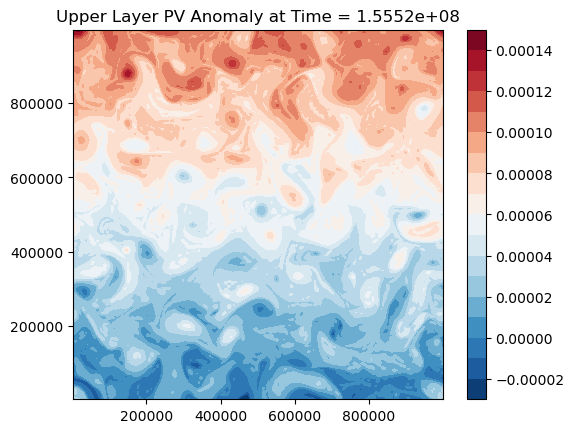

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'Upper Layer PV Anomaly at Time = 1.5552e+08'}>,
 <matplotlib.contour.QuadContourSet at 0x7fbf334962e0>)

In [39]:
plotUPVA1(modelQG_3)

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 2.64e-04, CFL: 0.040


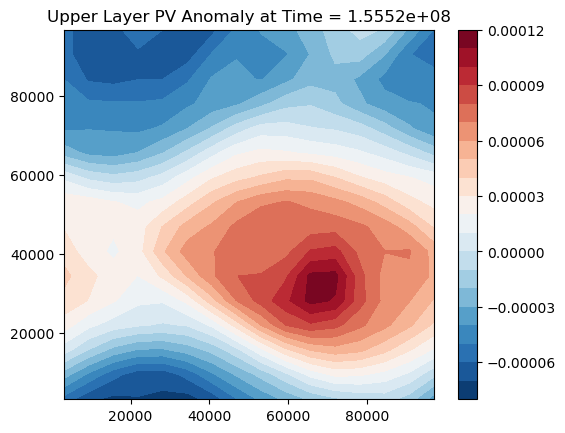

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'Upper Layer PV Anomaly at Time = 1.5552e+08'}>,
 <matplotlib.contour.QuadContourSet at 0x7fbf2b2466d0>)

In [53]:
# should still be considered "high res"
modelQG_4 = pyqg.QGModel(nx=16, L=100000, dt=dt3, tmax=tmax3, twrite=twrite3, tavestart=tavestart3)
modelQG_4.run()
plotUPVA1(modelQG_4)

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 2.48e-03, CFL: 0.030


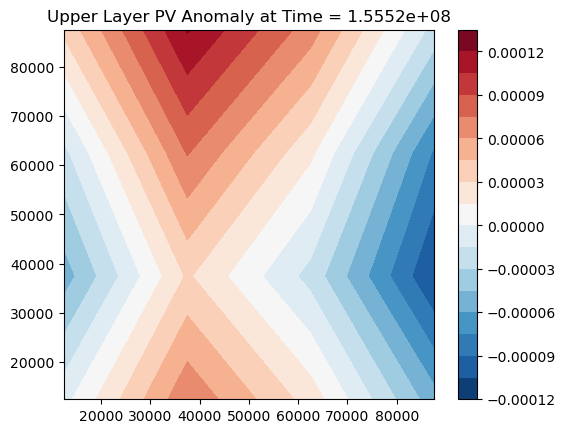

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'Upper Layer PV Anomaly at Time = 1.5552e+08'}>,
 <matplotlib.contour.QuadContourSet at 0x7fbf2b255070>)

In [54]:
modelQG_5 = pyqg.QGModel(nx=4, L=100000, dt=dt3, tmax=tmax3, twrite=twrite3, tavestart=tavestart3)
modelQG_5.run()
plotUPVA1(modelQG_5)

---
### 2. 3 (or more) layer model

In [22]:
# to fill in later

---
### 3. Filtering 

In [23]:
op1 = Operator1(modelQG_2, 16) # spectral truncation + sharp filter
op2 = Operator2(modelQG_2, 16) # spectral truncation + softer Gaussian filter
op3 = Operator3(modelQG_2, 16) # GCM-Filters + real-space coarsening
ops = [op1,op2,op3]


INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized


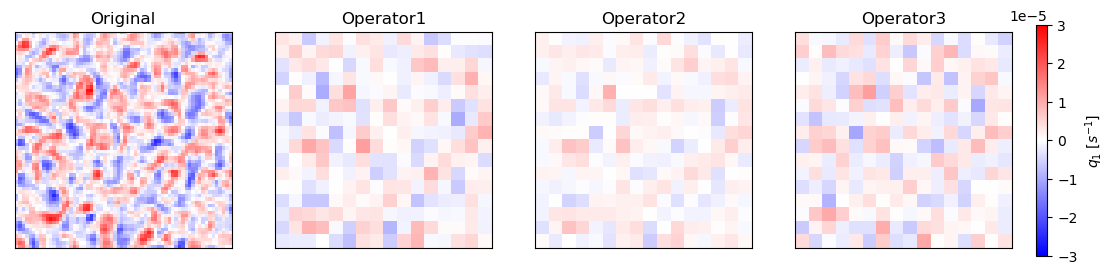

In [25]:
# visualize effects on q
def imshow(arr, vlim=3e-5):
    plt.xticks([]); plt.yticks([])
    return plt.imshow(arr, vmin=-vlim, vmax=vlim, cmap='bwr', interpolation='none')

fig = plt.figure(figsize=(15.5,3))
plt.subplot(1,4,1, title='Original')
imshow(modelQG_2.q[0])
for j, op in enumerate(ops):
    plt.subplot(1,4,j+2, title=op.__class__.__name__)
    im = imshow(op.m2.q[0])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$q_1$ [$s^{-1}$]')

---
### 3. Parameterizations/Subgrid Definitions

---
### 4. Metrics (Similarity/Difference)